In [36]:
import tensorflow as tf
import tensorflow.keras.datasets.imdb as imdb
import os
import numpy as np

In [ ]:
# datasets
https://ai.stanford.edu/~amaas/data/sentiment/

In [2]:
print(tf.__version__)

2.10.1


In [59]:
train_dir='datasets/aclImdb/train/'
test_dir='datasets/aclImdb/test/'
positive_train_dir='datasets/aclImdb/train/pos/'
negative_train_dir='datasets/aclImdb/train/neg/'
positive_test_dir='datasets/aclImdb/test/pos/'
negative_test_dir='datasets/aclImdb/test/neg/'

In [60]:
training_sentences=[]
training_labels=[]
testing_sentences=[]
testing_labels=[]

In [61]:
for sentence in os.listdir(positive_train_dir):
    with open(os.path.join(positive_train_dir,sentence), 'r', encoding='utf-8') as file:
        sentence=file.read()
        training_sentences.append(sentence)
        training_labels.append(1)
len(training_sentences),len(training_labels)

(12500, 12500)

In [62]:
for sentence in os.listdir(negative_train_dir):
    with open(os.path.join(negative_train_dir,sentence), 'r', encoding='utf-8') as file:
        sentence=file.read()
        training_sentences.append(sentence)
        training_labels.append(0)
len(training_sentences),len(training_labels)

(25000, 25000)

In [63]:
for sentence in os.listdir(positive_test_dir):
    with open(os.path.join(positive_test_dir,sentence), 'r', encoding='utf-8') as file:
        sentence=file.read()
        testing_sentences.append(sentence)
        testing_labels.append(1)
len(testing_sentences),len(testing_labels)

(12500, 12500)

In [64]:
for sentence in os.listdir(negative_test_dir):
    with open(os.path.join(negative_test_dir,sentence), 'r', encoding='utf-8') as file:
        sentence=file.read()
        testing_sentences.append(sentence)
        testing_labels.append(1)
len(testing_sentences),len(testing_labels)

(25000, 25000)

In [44]:
# training_sentences=[]
# training_labels=[]
# testing_sentences=[]
# testing_labels=[]

In [43]:
# training_data=tf.data.Dataset.from_tensor_slices((training_sentences,training_labels))

In [46]:
# for s,l in training_data:
#     training_sentences.append(s.numpy().decode('utf8'))
#     training_labels.append(l.numpy())

In [49]:
# len(training_labels)

25000

In [67]:
training_labels_final=np.array(training_labels)
testing_labels_final=np.array(testing_labels)

In [100]:
# generate Padded Sequence
vocab_size=1000
max_length=120
embedding_dim=16
trunc_type='post'
oov_tok='<OOV>'

In [101]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [102]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index

sequences=tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences,maxlen=max_length,truncating=trunc_type)

# Building and compile the model

In [103]:
model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 120, 16)           16000     
                                                                 
 flatten_5 (Flatten)         (None, 1920)              0         
                                                                 
 dense_10 (Dense)            (None, 20)                38420     
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 54,441
Trainable params: 54,441
Non-trainable params: 0
_________________________________________________________________


# train the model

In [104]:
num_epochs=10

history=model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded,testing_labels_final))

Epoch 1/10
782/782 [==============================] - 5s 5ms/step - loss: 0.5168 - accuracy: 0.7282 - val_loss: 1.1106 - val_accuracy: 0.5372
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.3770 - accuracy: 0.8329 - val_loss: 1.4247 - val_accuracy: 0.4470
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.3096 - accuracy: 0.8704 - val_loss: 1.2410 - val_accuracy: 0.5439
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2394 - accuracy: 0.9064 - val_loss: 1.5959 - val_accuracy: 0.5190
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.1752 - accuracy: 0.9369 - val_loss: 2.0657 - val_accuracy: 0.4998
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.1256 - accuracy: 0.9568 - val_loss: 2.4733 - val_accuracy: 0.4982
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0860 - accuracy: 0.9709 - val_loss: 2.8980 - val_accuracy: 0.4995
Epoch 

# visualize word embeddings 

In [106]:
embedding_layer=model.layers[0]
embedding_Weights=embedding_layer.get_weights()[0]
embedding_Weights.shape
reverse_word_index=tokenizer.index_word
embedding_Weights.shape

(1000, 16)

In [85]:
import io

out_v=io.open('datasets/vecs.tsv','w',encoding='utf-8')
out_m=io.open('datasets/meta.tsv','w',encoding='utf-8')

for word_num in range(1, vocab_size):
    word_name= reverse_word_index[word_num]
    word_embedding=embedding_Weights[word_num]
    out_m.write(word_name+'\n')
    out_v.write('\t'.join([str(x) for x in word_embedding])+'\n')
out_v.close()
out_m.close()

<Figure size 640x480 with 0 Axes>

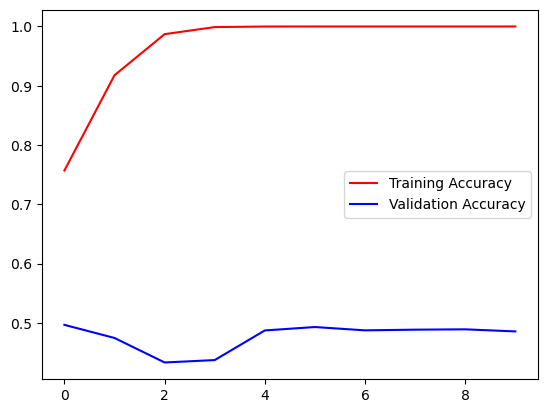

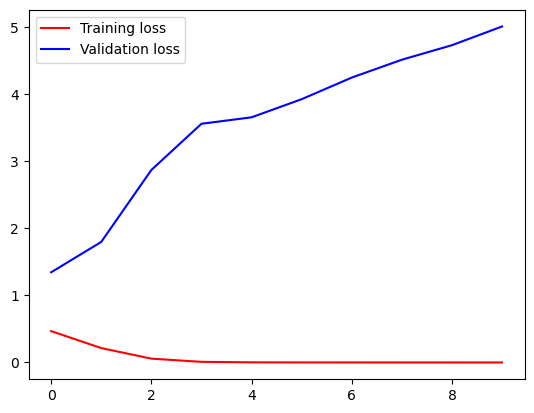

<Figure size 640x480 with 0 Axes>

In [99]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r' , label='Training Accuracy')
plt.plot(epochs, val_acc, 'b' , label='Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r' , label='Training loss')
plt.plot(epochs, val_loss, 'b' , label='Validation loss')
plt.legend()
plt.figure()